### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP4 - Processus de Poisson composés, transformation de Esscher, splitting et MCMC

Quelques rappels en python :

- `random.exponential` du module `numpy`. Pour la simulation de v.a. exponentielles. Attention à la convention sur les paramètres.
- `random.poisson` du module `numpy`. Pour la simulation de v.a. de Poisson.
- `poisson.sf` du module `scipy.stats`. Pour la fonction de survie d'une v.a. de Poisson.
- `random.standard_cauchy` du module `numpy`. Pour la simulation de v.a. de Cauchy standards.
- `cumsum` du module `numpy`.  Pour le calcul de la somme cumulée des éléments d'un tableau.
- `sort` du module `numpy`. Pour ordonner les éléments d'un tableau.
- `boxplot` du module `matplotlib.pyplot`. Pour tracer des boîtes à moustaches (boxplots).

Représentation d'un array `numpy` par un boxplot :  affichage d'une boîte rectangulaire délimitée par les premier et troisième quartiles ; la
  barre inétrieure (rouge) donne la médiane ; la "moustache" inférieure (resp. supérieure) va jusqu'à la
  valeur la plus petite (resp. grande) située entre le premier (resp. troisième) quartile et 1.5 fois la hauteur de la boîte ; les éventuels points de l'échantillon au-delà des moustaches sont représentés par des "+".

## 1. Processus  de Poisson homogènes et composés

### 1.1. Rappels : Processus de Poisson


Soit $\lambda >0$.
Un processus de Poisson homogène de paramètre $\lambda$ est un processus
$(N_t)_{t\geq 0}$ issu de $0$, à accroissement indépendants, tel que pour tout
$0 \leq s < t$, $N_t-N_s$ suit une loi de Poisson de paramètre $\lambda(t-s)$.

Ce processus peut être obtenu en posant
$$N_t = \textrm{Card}\{k\geq 1~: T_k\leq t\} = \sum_{k \geq 1} \mathbf{1}_{T_k \leq t}$$
où $T_k = T_{k-1} + E_k = E_1 + \cdots + E_k$,  pour des v.a. $(E_i)_{i \geq 1}$ i.i.d. de loi exponentielle de paramètre $\lambda$, et par convention $T_0 =0$.

Soit $\lambda >0$ et $\nu$ une loi de probabilité sur $\mathbb{R}$. Un processus
  de Poisson composé de paramètres $(\lambda, \nu)$ est un processus $(X_t)_{t\geq
  0}$ défini par
$$X_t = \sum_{k=1}^{N_t} Y_k,$$
où les sauts $(Y_k)_{k \geq 1}$ sont des v.a. réelles i.i.d. de loi $\nu$
indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène de paramètre
$\lambda$.


### 1.2. Simulations d'un processus  de Poisson homogène

##### Simulation d'une trajectoire sur $[0,T_n]$, $n$ fixé 
Utiliser le fait que 
$$N_t = \begin{cases}0&\textrm{pour $t\in [0, T_1[$,}\\
  1&\textrm{pour $t\in [T_1, T_2[$,}\\
  2&\textrm{pour $t\in [T_2, T_3[$,}\\
  \vdots &\quad\vdots\end{cases}$$
et que les instants de sauts $(T_k)_{1
  \leq k \leq n}$ s'expriment à l'aide de tirages de la loi exponentielle. 

#####  Simulation d'une trajectoire sur $[0,T]$, $T$ fixé 
Utiliser la loi de $N_T$ puis le fait que, conditionnellement à l'événement $\{N_T = k \}$, la loi des instants de sauts $(T_1, \cdots, T_k)$ est la loi de $k$ v.a. uniformes sur $[0,T]$ réordonnées (cf. Amphi 1). Pour l'affichage d'une fonction en escalier, on pourra utiliser la fonction `step` de `matplotlib.pyplot` (nous vous conseillons de consulter la documentation de cette fonction, notamment pour comprendre le rôle de son argument "`where`").  

##### Question 1
En utilisant ces deux approches, simuler et tracer sur une même figure une trajectoire d'un processus de Poisson homogène jusqu'à l'instant $T_n$ d'une part (pour $n\ge 1$ fixé), et une trajectoire jusqu'à l'instant $T$ d'autre part (pour $T>0$ fixé). On pourra par exemple prendre $n=30$, $\lambda=3$ et $T=n/\lambda=10$.

##### _Réponse :_

In [10]:
T_sep

array([2.49357301, 2.26732551, 4.98071729, 4.24786266, 9.79773052,
       8.08119576, 2.4098638 , 7.54882034, 5.08652265, 3.48261398,
       2.04938284, 1.15030885, 4.81573825, 4.61977483, 4.31171992,
       3.39775708, 0.99510719, 6.11446603, 6.25284873, 0.80815787,
       9.36204316, 7.98175855, 5.23094959, 9.20604551, 2.29192547,
       8.27731881, 4.66879221, 4.18212003, 3.28857129, 8.54466456,
       2.76266127, 6.65857258, 1.9479945 , 5.98031982, 1.14932709,
       5.47154017, 5.07671255, 1.43086421])

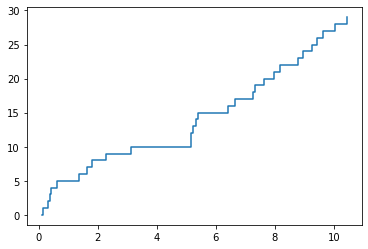

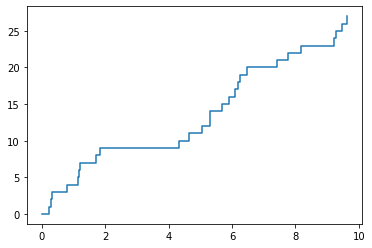

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = 30
lamb = 3
T = n / lamb

# Fixant n
T_sep = np.random.exponential(scale=1/lamb, size=n)
N = T_sep.cumsum()
plt.step(N, [i for i in range(n)], where='post')
plt.title("Fixant n")
plt.show()

# Fixant T
N_T = np.random.poisson(lam=lamb * T)
T_sep = np.random.uniform(low=0, high=T, size=N_T)
T_sep.sort()
plt.step(x=T_sep, y=[i for i in range(N_T)], where='post')
plt.title("Fixant T")
plt.show()

##### Question 2  
Adapter le code précédent pour tracer deux trajectoires d'un processus de Poisson composé sur $[0,T]$ : pour la loi des sauts $(Y_k)_{k\ge 1}$, on envisagera successivement une loi exponentielle (par exemple de moyenne 2), puis la loi de la valeur absolue d'une v.a. de Cauchy standard.  Quelle différence remarque-t-on dans la régularité de l'amplitude des sauts ? 

##### _Réponse :_

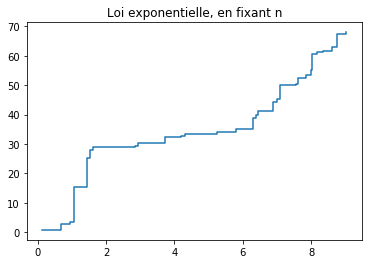

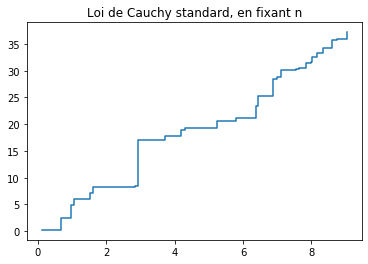

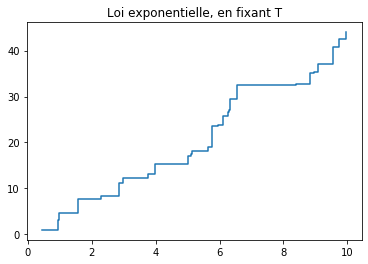

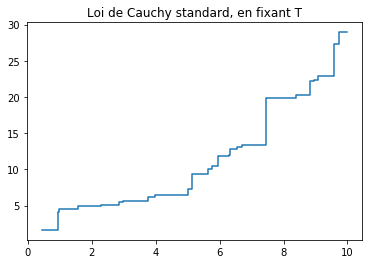

In [45]:
#### Fixant n
T_sep = np.random.exponential(scale=1/lamb, size=n)
N = T_sep.cumsum()
## Loi exponentielle
expo = np.random.exponential(scale=2, size=n)
expo = expo.cumsum()
plt.step(N, expo, where='post')
plt.title("Loi exponentielle, en fixant n")
plt.show()
## Cauchy standard
cauc = np.abs(np.random.standard_cauchy(size=n))
cauc = cauc.cumsum()
plt.step(N, cauc, where='post')
plt.title("Loi de Cauchy standard, en fixant n")
plt.show()

#### Fixant T
N_T = np.random.poisson(lam=lamb * T)
T_sep = np.random.uniform(low=0, high=T, size=N_T)
T_sep.sort()
## Loi exponentielle
expo = np.random.exponential(scale=2, size=N_T)
expo = expo.cumsum()
plt.step(T_sep, expo, where='post')
plt.title("Loi exponentielle, en fixant T")
plt.show()
## Cauchy standard
cauc = np.abs(np.random.standard_cauchy(size=N_T))
cauc = cauc.cumsum()
plt.step(T_sep, cauc, where='post')
plt.title("Loi de Cauchy standard, en fixant T")
plt.show()

## 2. Changement de probabilité pour les processus de Poisson  

Soient $\lambda >0$, $\nu$ une loi de probabilité sur $\mathbb{R}$, des v.a. réelles
  $(Y_k)_{k \geq 1}$ et un processus $(N_t)_{t \geq 0}$ définis sur l'espace
  probabilisable $(\Omega, \mathcal{F})$. On munit cet espace de la probabilité
  $\mathbb{P}$ telle que, sous $\mathbb{P}$, les v.a. $(Y_k)_{k \geq 1}$ sont i.i.d. de loi
  $\nu$ et indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène
  de paramètre $\lambda$.  Notons
 $$X_t = \sum_{k=1}^{N_t} Y_k.$$
  D'après la Section 1, sous $\mathbb{P}$, $(X_t)_{t \geq 0}$
  est un processus de Poisson composé de paramètres $(\lambda, \nu)$. Dans la
  suite, $\mathbb{E}$ et $\mathbb{V}$ désignent respectivement l'espérance et la variance sous $\mathbb{P}$.
 

### 2.1. Rappel de cours : la transformation de Esscher
 À toute fonction mesurable $f: \mathbb{R} \to \mathbb{R}$ telle que $ \mathbb{E}\left[ \exp(f(Y_1)) \right]< \infty$, on associe une loi de probabilité $\mathbb{P}_f$ sur
  $(\Omega, \mathcal{F})$ définie par
$$\mathbb{P}_f (A)=\mathbb{E}\left[ \mathbf{1}_A \ \exp\left\{ \sum_{k=1}^{N_T} f(Y_k) - \lambda T \left(  \mathbb{E}\left[ \exp(f(Y_1)) \right]-1 \right) \right\} \right] \qquad\qquad\qquad (1)$$
pour tout $A \in \mathcal{F}_T= \sigma\left(X_s, s \leq T \right)$.  Sous $\mathbb{P}_f$, $(X_t)_{t\geq 0 }$ est encore un processus de Poisson composé, mais de paramètres $(\lambda^f, \nu^f)$ donnés par (cf. Amphi 3)
  $$\lambda^f = \lambda \, \mathbb{E} \left[ \exp(f(Y_1))\right], \qquad \nu^f(dy)=\frac{\exp(f(y))}{\mathbb{E}\left[ \exp(f(Y_1)) \right]} \, \nu(dy).$$ 

### 2.2. Cas de sauts constants
  Dans cette section, on s'intéresse au calcul de $\mathbb{P}(X_T >x)$ pour de grandes valeurs $x$ dans le cas où $\nu$ est la mesure de Dirac en $\alpha>0$, c'est-à-dire $\mathbb{P}(Y_1 =\alpha) =1$. On a donc tout simplement $X_t = \alpha \,  N_t$ pour tout $t\geq 0$. Dans toute la suite, pour $\theta \in \mathbb{R}$, on notera respectivement  $\mathbb{P}_\theta,
 \nu^\theta, \lambda^\theta$ les quantités $\mathbb{P}_f, \nu^f, \lambda^f$
 introduites en Section 2.1 lorsque $f: y \mapsto \theta y$. Enfin,
 $\mathbb{E}_\theta$ et $\mathbb{V}_\theta$ désignent l'espérance et la variance sous $\mathbb{P}_\theta$.

##### Question 3 
Pour $\theta \in \mathbb{R}$, calculer la fonction log-laplace $\Gamma_T(\theta)$
    associée à $X_T$, définie par 
$$\Gamma_T(\theta)=\log\mathbb{E}[\exp({\theta X_T})].$$ 
En déduire l'espérance et la variance de $X_T$ sous $\mathbb{P}$.

##### _Réponse :_

##### Question 4  
Exprimer le changement de loi (1) à l'aide de $X_T, \theta$ et $\Gamma_T(\theta)$. Quelle est la loi de $(X_t)_{t \geq 0}$ sous $\mathbb{P}_\theta$, pour $\theta \in \mathbb{R}$ ? 

##### _Réponse :_

##### Question 5 
Soit $\theta \in \mathbb{R}, T >0$. En déduire l'expression d'une v.a.
  $L_{\theta,T}$ telle que pour toute fonction mesurable positive $g :\mathbb{R} \rightarrow \mathbb{R}_{+}$ on ait
$$\mathbb{E}\left[ g(X_T) \right] = \mathbb{E}_\theta \left[ g(X_T) \frac{1}{L_{\theta,T}}\right]. \qquad\qquad\qquad (2)$$
En notant $I=\mathbb{E}\left[ g(X_T) \right]$, donner l'expression d'un estimateur par échantillonnage d'importance $\hat I_M^{IS}$ basé sur $M$ simulations i.i.d. $\tilde X_T^{(k)}$ sous $\mathbb{P}_\theta$. Montrer que $\hat I_M^{IS}$ est asymptotiquement normal, en explicitant la variance asymptotique $(\sigma^{IS})^2$. Proposer un estimateur $(\hat\sigma^{IS}_M)^2$ de cette variance en fonction des $\tilde X_T^{(k)}$ et en déduire un intervalle de confiance asymptotique à $95\%$ de $I$. 

##### _Réponse :_

##### Question 6
Pour $x>\mathbb{E}[X_T]$, résoudre l'équation $\Gamma'_T(\theta)=x$ sur $\mathbb{R}$. On notera $\theta_x$ cette solution.

##### _Réponse :_

### 2.3. Application
Les processus de Poisson composés sont souvent utilisés pour modéliser l'état de la comptabilité des compagnies d'assurance. En effet, si une compagnie d'assurance de capital initial $C$ reçoit à chaque unité de temps des cotisations d'une valeur de $\Lambda$ et doit
effectuer des dédommagements de loi $\nu$ répartis dans le temps selon un processus de Poisson d'intensité $\lambda$, alors ses liquidités, à toute date $t$,
sont données par $$C+\Lambda t-X_t,$$
où $X_t$ est un processus de Poisson composé d'intensité $\lambda$ et de sauts de loi $\nu$ sur $\mathbb{R}_+$. Afin d'éviter le risque de faillite, la compagnie d'assurance est alors amenée à évaluer $\mathbb{P}(X_T>x)$ pour des valeurs de $x$ élevées.

##### Question 7  
Les valeurs de $x$ qui rendent l'événement $\{X_T>x\}$ rare sous $\mathbb{P}$
  seront de la forme
$$x=\mathbb{E}[X_T]+\rho\sqrt{\mathbb{V}(X_T)}, \qquad\qquad\qquad (3)$$
pour $\rho>0$ grand. 
Comparer la méthode de Monte-Carlo naïve et la méthode d'échantillonnage d'importance issue de la relation (2) lorsque $\theta = \theta_x$ de la question 6 : observer la consistance des estimateurs et donner des intervalles de confiance asymptotiques de la quantité $\mathbb{P}(X_T>x)$ pour chaque méthode. On prendra $T=1$, $\lambda=1$, $\nu= \delta_\alpha$ pour $\alpha =0.5$ et $x$ donné par (3) pour $\rho =1$, $\rho=5$ et $\rho =20$.

##### _Réponse :_

In [49]:
T = 1
lamb = 1
alpha = 0.5
n = int(1e5)

def Question_7(rho, size=n):
    print("rho = {}".format(rho))
    x = alpha * lamb * T + rho * np.sqrt(alpha * alpha * lamb * T)

    # Monte-Carlo naive
    print("Méthode de Monte-Carlo pour rho = {}".format(rho))
    X_T = (np.random.poisson(lam=lamb, size=n) * alpha) > x
    mean = X_T.mean()
    std = X_T.std() * 1.96 / np.sqrt(n)
    print("La valeur réelle tombe dans l'intervalle {} +- {} avec 95% de confiance".format(mean, std))
    
    # Echantillonnage d'importance
    print("Méthode d'échantillonnage d'importance pour rho = {}".format(rho))
    theta_x = 1 / alpha * np.log(x / alpha / T / lamb)
    X_T = np.random.poisson(lam=lamb * np.exp(theta_x * alpha), size=n) * alpha
    L_theta_t = np.exp(theta_x * X_T - T * lamb * (np.exp(theta_x * alpha) - 1))
    X_T = (X_T > x) / L_theta_t
    mean = X_T.mean()
    std = X_T.std() * 1.96 / np.sqrt(n)
    print("La valeur réelle tombe dans l'intervalle {} +- {} avec 95% de confiance".format(mean, std))
    print()

########### Rho = 1
Question_7(1)
########### Rho = 5
Question_7(5)
########### Rho = 20
Question_7(20)

rho = 1
Méthode de Monte-Carlo pour rho = 1
La valeur réelle tombe dans l'intervalle 0.0807 +- 0.0016881905651199448 avec 95% de confiance
Méthode d'échantillonnage d'importance pour rho = 1
La valeur réelle tombe dans l'intervalle 0.07989533335253725 +- 0.0008136802511861076 avec 95% de confiance

rho = 5
Méthode de Monte-Carlo pour rho = 5
La valeur réelle tombe dans l'intervalle 9e-05 +- 5.879735394046233e-05 avec 95% de confiance
Méthode d'échantillonnage d'importance pour rho = 5
La valeur réelle tombe dans l'intervalle 8.320539996129085e-05 +- 1.1192854241688265e-06 avec 95% de confiance

rho = 20
Méthode de Monte-Carlo pour rho = 20
La valeur réelle tombe dans l'intervalle 0.0 +- 0.0 avec 95% de confiance
Méthode d'échantillonnage d'importance pour rho = 20
La valeur réelle tombe dans l'intervalle 3.3744800604523955e-22 +- 6.687358331597403e-24 avec 95% de confiance



## 3. Méthode de splitting et Processus de Poisson

### 3.1. Rappels de cours : méthode de splitting via MCMC

Soit $\mathbf{N} = (N_t)_{t \geq 0}$ un processus de Poisson homogène de paramètre $\lambda
$. Pour calculer la probabilité d'un événement rare de la forme $ \{ \Phi(\mathbf{N})
\leq a \}$ où $\Phi(\mathbf{N})$ désigne une fonctionnelle de la trajectoire du
processus de Poisson $(N_t)_{t \geq 0}$, la méthode de splitting consiste à
- choisir $K$ seuils : $a = a_K < \cdots < a_2 < a_1 < a_0 = +\infty$ ;
- pour tout $k =1, \cdots, K$, approcher $\mathbb{P}\left(\Phi(\mathbf{N}) \leq a_{k}
    \vert \Phi(\mathbf{N}) \leq a_{k-1} \right)$ par un estimateur $\hat{\pi}_k$. 
- estimer $\mathbb{P}(\Phi(\mathbf{N}) \leq a)$ par $\prod_{k=1}^K \hat{\pi}_k$.

Soit $k \in \{1, \cdots, K \}$ fixé. L'algorithme *MCMC pour loi conditionnelle* ci-dessous permet de produire une suite de processus de Poisson $\{\mathbf{N}^\ell, \ell \geq 0 \}$, vérifiant une loi forte des grands nombres : pour tout $b \in \mathbb{R}$, on a
$$\frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\Phi(\mathbf{N}^\ell) \leq b}
 \quad \mathop{\longrightarrow}^{\mathrm{p.s.}}_{M \rightarrow \infty} \quad  \mathbb{P}\left(\Phi(\mathbf{N}) \leq b \ \vert\ \Phi(\mathbf{N})
  \leq a_{k-1} \right).$$
Plus précisément, cet algorithme construit une chaîne de Markov $\mathbf{N}^\ell$ à valeurs dans un espace de processus de Poisson, pour laquelle le théorème ergodique s'applique (pour plus de détails, on pourra consulter l'article [Rare event simulation using reversible shaking transformations](https://hal.archives-ouvertes.fr/hal-01058748/document)). Il peut donc être utilisé pour construire l'estimateur $\hat{\pi}_k$. 

Algorithme MCMC pour loi conditionnelle $\mathbb{P} (\cdot\ \vert\ \Phi(\mathbf{N})\leq a_{k-1})$} 
- Paramètres d'implémentation : $p \in ]0,1[$, $a_{k-1} \in \mathbb{R}$, $M \in \mathbb{N}$
- Initialisation : $\mathbf{N}^{0}$ un processus de Poisson homogène de paramètre
  $\lambda$ tel que $\Phi(\mathbf{N}^0) \leq a_{k-1}$.
- Pour $\ell = 0, \cdots, M-1$ : étant donné $\mathbf{N}^{\ell}$,

   (a) construire un candidat $\widetilde{\mathbf{N}}^{\ell+1}$ par *coloriage*, c'est-à-dire : garder chaque saut de $\mathbf{N}^\ell$ avec probabilité $p$, de manière indépendante : on obtient $\mathbf{N}^{\ell,p}$ ; construire un processus de Poisson homogène $\widetilde{\mathbf{N}}$ de paramètre $(1-p) \lambda$, indépendant de $\mathbf{N}^{\ell,p}$ ; renvoyer la somme $\widetilde{\mathbf{N}}^{\ell+1} := \mathbf{N}^{\ell,p} + \widetilde{\mathbf{N}}$.
   
   (b) si $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$, poser $\mathbf{N}^{\ell+1} =
    \widetilde{\mathbf{N}}^{\ell+1}$. Sinon,  poser $\mathbf{N}^{\ell+1} = \mathbf{N}^{\ell}$.

Remarque : L'algorithme *MCMC pour loi conditionnelle* est un algorithme de rejet : on rejette tous les candidats $\widetilde{\mathbf{N}}^{\ell+1}$ qui ne satisfont pas la condition $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$. Pour chacune des $K-1$ chaînes simulées par cet algorithme, il est intéressant d'observer l'évolution du taux d'acceptation le long de la trajectoire
$$M \mapsto \frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\mathbf{N}^{\ell} = \widetilde{\mathbf{N}^{\ell}}}.$$
Comme nous allons le voir, ce taux d'acceptation dépend du paramètre $p$.


### 3.2. Application

On reprend l'application décrite en Section 2.3, avec $\nu=\delta_\alpha$.

#### Question 8
Montrer que p.s.
$$\min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\} = \min_{n
  \geq 0 \ \text{t.q.} \ T_n \leq T} \left\{ C + \Lambda T_n - \alpha n\right\}.$$

##### _Réponse :_

#### Question 9 
On veut estimer la probabilité de ruine de l'assurance avant l'instant $T$, c'est-à-dire :
$$\mathbb{P}\left( \min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\}
    \leq 0 \right).$$
On prendra $T=1$, $C= 100$, $\Lambda = 30$, $\alpha=30$, $a_k = C (1-(k/K)^2)$ et
   $(\lambda,K) =(1,3)$ ou $(\lambda, K) = (0.05,8)$. On envisagera différentes valeurs de $p\in\{0.1,0.2,\dots,0.9\}$.

(a) Implémenter l'algorithme de splitting combiné à l'algorithme *MCMC pour loi conditionnelle* pour estimer cette probabilité de ruine. Observer la consistance des estimateurs $\hat \pi_k$, $k=1, \cdots, K$, c'est-à-dire que ces sont des estimateurs convergents lorsque $M$ devient grand. Afficher l'évolution du taux d'acceptation. Dans le cas $(\lambda,K) =(1,3)$, on pourra prendre $M=1e4$ ; dans le cas $(\lambda, K) = (0.05,8)$, on pourra prendre $M=1e5$. On observera par exemple les différences entre $p=0.1$,  $p=0.5$  et $p=0.9$.

##### _Réponse :_

In [51]:
def Phi(T, alpha):
    J = C + Gamma * T - alpha * np.arange(1, len(T) + 1)
    return J.min() <= alpha

p_all = np.linspace(0.1, 0.9, 9)
plot = [0.1, 0.5, 0.9]
T = 1
C = 100
Gamma = 30
alpha = 30

lamb, K = 1, 3
M = int(1e4)
alpha_k = [C * (1 - (k / K)** 2) for k in range(1, K + 1)]

for p in p_all:
    N_0 = int()
    T = np.random.uniform(low=0, high=T, size=N_0)
    np.sort(T)
    for i in range(M):
        


lamb, K = 0.05, 8
M = int(1e5)
alpha_k = [C * (1 - (k / K)** 2) for k in range(1, K + 1)]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

(b) Considérons $(\lambda,K) =(1,3)$, $M=1e3$ et $p\in\{0.1,0.2,\dots,0.9\}$ successivement. Pour ces valeurs de $p$, illustrer par des boxplots la variabilité de l'estimateur de la probabilité de ruine à l'aide de plusieurs réalisations indépendantes de cet estimateur (par exemple 100). Calculer aussi pour chaque valeur de $p$ l'erreur relative, i.e. le ratio de l'écart-type et de la valeur moyenne de ces réalisations indépendantes. Quelles valeurs de 𝑝 préconiseriez-vous ? 

##### _Réponse :_